# Detection of Fraud Reviews: Modeling and Evaluation

# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Reading datasets

## Train dataset

In [2]:
# Path to your CSV file
X_train_merged_path = '/Users/ShanShan/Fake-Reviews-Detection/ShanShan_notebooksv1/X_train_merged.csv'

y_train_merged_path = '/Users/ShanShan/Fake-Reviews-Detection/ShanShan_notebooksv1/y_train_merged.csv'

# Read the CSV file
X_train_merged = pd.read_csv(X_train_merged_path)

y_train_merged = pd.read_csv(y_train_merged_path)

Information

In [3]:
X_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542931 entries, 0 to 542930
Columns: 546 entries, word_count to yet
dtypes: float64(544), int64(2)
memory usage: 2.2 GB


In [4]:
y_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542931 entries, 0 to 542930
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   label   542931 non-null  int64
dtypes: int64(1)
memory usage: 4.1 MB


Shape

In [5]:
X_train_merged.shape

(542931, 546)

In [6]:
y_train_merged.shape

(542931, 1)

Columns

In [7]:
X_train_merged.columns

Index(['word_count', 'avg_word_length', 'avg_sentence_length',
       'uppercase_char_count', 'rating', 'rating.1', 'Sentiment_Neutral',
       'Sentiment_Positive', 'category_Clothing_Shoes_and_Jewelry_5',
       'category_Electronics_5',
       ...
       'working', 'world', 'worth', 'would', 'wow', 'write', 'wrong', 'year',
       'yes', 'yet'],
      dtype='object', length=546)

In [8]:
y_train_merged.columns

Index(['label'], dtype='object')

Structure

In [9]:
# Display the first few rows
X_train_merged.head()

,word_count,avg_word_length,avg_sentence_length,uppercase_char_count,rating,rating.1,Sentiment_Neutral,Sentiment_Positive,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,...,working,world,worth,would,wow,write,wrong,year,yes,yet
0,4,7.000000,4.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,159,4.226415,17.666667,17,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.143049,0.0,0.0,0.0,0.0,0.0,0.0
2,56,4.125000,18.666667,9,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,171,3.970760,9.500000,24,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,291,4.058419,13.857143,24,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y_train_merged.head()

,label
0,0
1,0
2,0
3,0
4,0


## Test dataset

In [11]:
# Path to your CSV file
X_test_merged_path = '/Users/ShanShan/Fake-Reviews-Detection/ShanShan_notebooksv1/X_test_merged.csv'

y_test_merged_path = '/Users/ShanShan/Fake-Reviews-Detection/ShanShan_notebooksv1/y_test_merged.csv'

# Read the CSV file
X_test_merged = pd.read_csv(X_test_merged_path)

y_test_merged = pd.read_csv(y_test_merged_path)

Information

In [12]:
X_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79124 entries, 0 to 79123
Columns: 546 entries, word_count to yet
dtypes: float64(544), int64(2)
memory usage: 329.6 MB


In [13]:
y_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79124 entries, 0 to 79123
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   79124 non-null  int64
dtypes: int64(1)
memory usage: 618.3 KB


Shape

In [14]:
X_test_merged.shape

(79124, 546)

In [15]:
y_test_merged.shape

(79124, 1)

Columns

In [16]:
X_test_merged.columns

Index(['word_count', 'avg_word_length', 'avg_sentence_length',
       'uppercase_char_count', 'rating', 'rating.1', 'Sentiment_Neutral',
       'Sentiment_Positive', 'category_Clothing_Shoes_and_Jewelry_5',
       'category_Electronics_5',
       ...
       'working', 'world', 'worth', 'would', 'wow', 'write', 'wrong', 'year',
       'yes', 'yet'],
      dtype='object', length=546)

In [17]:
y_test_merged.columns

Index(['label'], dtype='object')

Structure

In [18]:
# Display the first few rows
X_test_merged.head()

,word_count,avg_word_length,avg_sentence_length,uppercase_char_count,rating,rating.1,Sentiment_Neutral,Sentiment_Positive,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,...,working,world,worth,would,wow,write,wrong,year,yes,yet
0,161,4.279503,14.636364,16,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.12641,0.000000,0.0,0.0
1,38,4.394737,12.666667,4,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0
2,93,3.892473,13.285714,27,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.192925,0.00000,0.147469,0.0,0.0
3,61,4.147541,7.625000,11,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.096842,0.0,0.000000,0.00000,0.000000,0.0,0.0
4,68,3.897059,11.333333,6,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.132394,0.0,0.000000,0.00000,0.000000,0.0,0.0


In [19]:
# Display the first few rows
y_test_merged.head()

,label
0,0
1,0
2,0
3,0
4,0


# Check for missing values

## Train dataset

In [20]:
# Check for missing values
X_train_merged.isnull().sum()

word_count              0
avg_word_length         0
avg_sentence_length     0
uppercase_char_count    0
rating                  0
                       ..
write                   0
wrong                   0
year                    0
yes                     0
yet                     0
Length: 546, dtype: int64

In [21]:
# Check for missing values
y_train_merged.isnull().sum()

label    0
dtype: int64

## Test dataset

In [22]:
# Check for missing values
X_test_merged.isnull().sum()

word_count              0
avg_word_length         0
avg_sentence_length     0
uppercase_char_count    0
rating                  0
                       ..
write                   0
wrong                   0
year                    0
yes                     0
yet                     0
Length: 546, dtype: int64

In [23]:
# Check for missing values
y_test_merged.isnull().sum()

label    0
dtype: int64

# Scaling

In [24]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_merged)
X_test_scaled = scaler.transform(X_test_merged)

# Modeling

In [25]:
y_train_merged = y_train_merged['label']

In [26]:
# Hyperparameter tuning
n_iter=30
cv=10
scoring='recall'
random_state=42

In [27]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test)
    
    # Check if model supports decision_function or predict_proba
    try:
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_pred_prob = model.decision_function(X_test)  # Use decision_function for PAClassifier
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print and plot confusion matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    
    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


In [28]:
# General function for hyperparameter tuning using RandomizedSearchCV
def hyperparameter_tuning(model, param_distributions, X_train, y_train, n_iter, cv, scoring, random_state):
    # Initialize RandomizedSearchCV
    randomized_search = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=cv, scoring=scoring, random_state=random_state)
    
    # Fit RandomizedSearchCV
    randomized_search.fit(X_train, y_train)
    
    # Print the best parameters found
    print(f"Best parameters: {randomized_search.best_params_}")
    
    # Return the best estimator
    return randomized_search.best_estimator_

# Logistic Regression

## Initial model

In [29]:
# Define the initial model configuration
lg_model_config = {
    'max_iter': 1000,
    'random_state': 42,
    'penalty': 'l1',  # L1 Regularization
    'solver': 'liblinear'  # Must use solver supporting L1
}

lg_model = LogisticRegression(**lg_model_config)

# Parameter distributions for hyperparameter tuning
lg_param_distributions = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'tol': [1e-4, 1e-3, 1e-2],
    'max_iter': [500, 1000, 2000]
}

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.62      0.73     67805
           1       0.22      0.63      0.32     11319

    accuracy                           0.62     79124
   macro avg       0.56      0.62      0.53     79124
weighted avg       0.81      0.62      0.68     79124

Confusion Matrix:


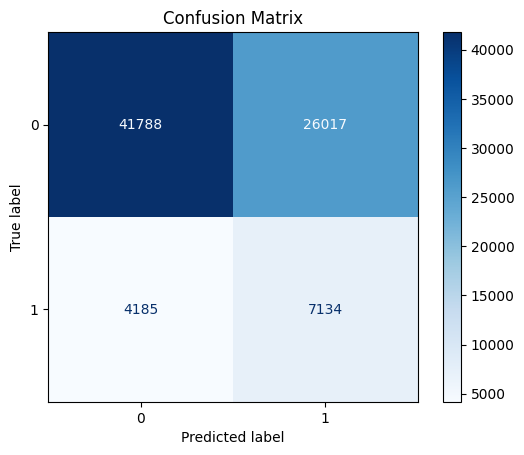

Accuracy: 0.6183
Precision: 0.2152
Recall: 0.6303
F1 Score: 0.3208
AUC-ROC: 0.6746


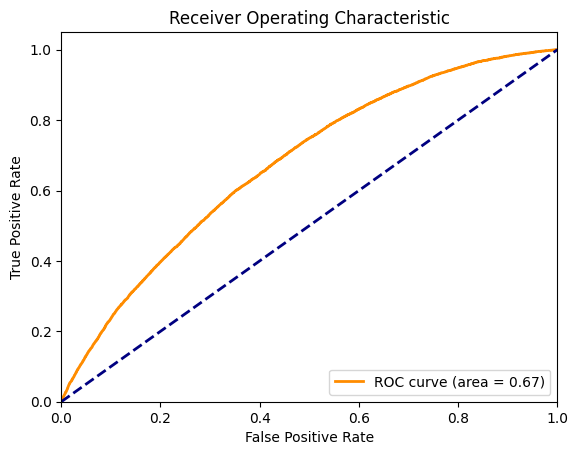

In [30]:
# Train and evaluate the model
train_and_evaluate_model(lg_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

# Adaboost Model

## Initial model

In [31]:
# Define the initial model configuration
ada_model_config = {
    'n_estimators': 100,
    'algorithm': 'SAMME',
    'learning_rate': 0.1,
    'random_state': 42
}

ada_model = AdaBoostClassifier(**ada_model_config)

ada_param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3, 4, 5]
}

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.82     67805
           1       0.17      0.28      0.21     11319

    accuracy                           0.70     79124
   macro avg       0.52      0.52      0.51     79124
weighted avg       0.77      0.70      0.73     79124

Confusion Matrix:


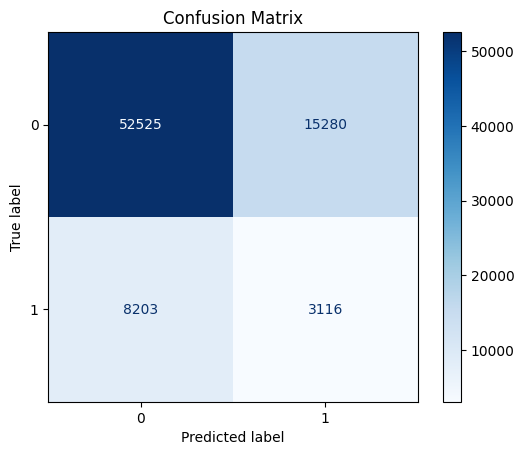

Accuracy: 0.7032
Precision: 0.1694
Recall: 0.2753
F1 Score: 0.2097
AUC-ROC: 0.5567


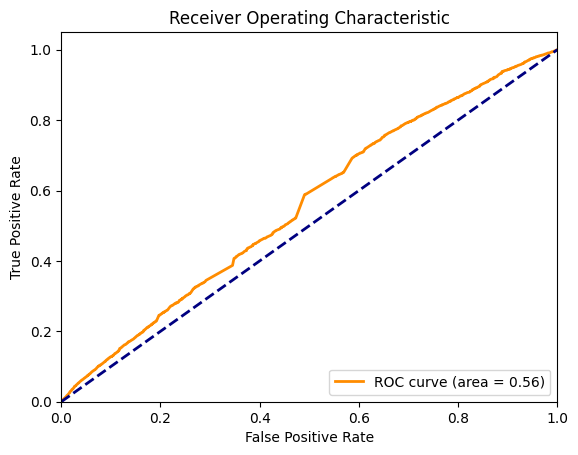

In [32]:
# Train and evaluate the model
train_and_evaluate_model(ada_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

# XGBoost

## Initial model

In [33]:
# Define the initial model configuration
xgb_model_config = {
    'n_estimators': 100,
    'eval_metric': 'logloss',
    'max_depth': None,
    'learning_rate': 0.01,
    'random_state': 42,
}

xgb_model = XGBClassifier(**xgb_model_config)

xgb_param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     67805
           1       0.27      0.32      0.30     11319

    accuracy                           0.78     79124
   macro avg       0.58      0.59      0.58     79124
weighted avg       0.80      0.78      0.79     79124

Confusion Matrix:


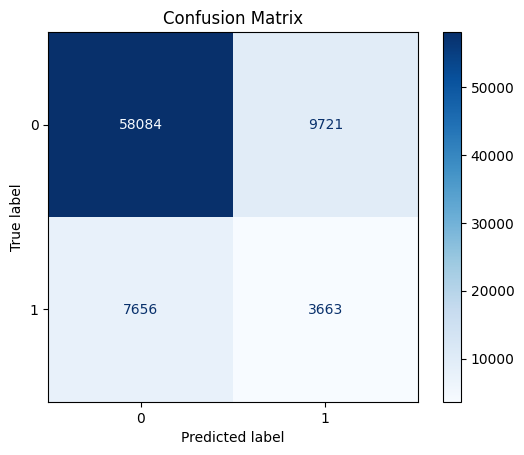

Accuracy: 0.7804
Precision: 0.2737
Recall: 0.3236
F1 Score: 0.2966
AUC-ROC: 0.6928


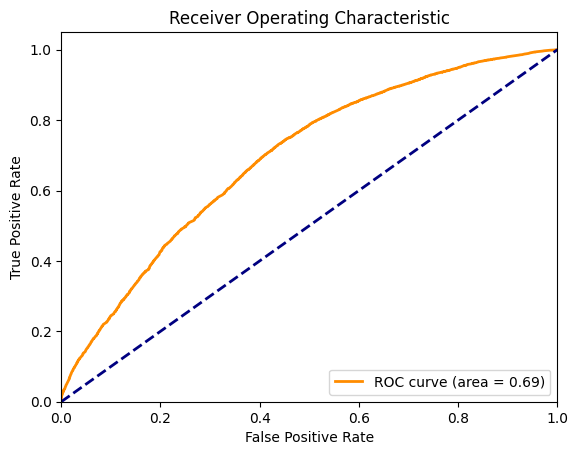

In [34]:
# Train and evaluate the model
train_and_evaluate_model(xgb_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

# Random Forest

## Initial model

In [35]:
# Define the initial model configuration
rf_model_config = {
    'n_estimators': 100,
    'criterion': 'log_loss',
    'max_depth': None,  # No limit on depth
    'min_samples_split': 2,
    'random_state': 42
}

rf_model = RandomForestClassifier(**rf_model_config)

rf_param_distributions = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     67805
           1       0.73      0.30      0.43     11319

    accuracy                           0.88     79124
   macro avg       0.81      0.64      0.68     79124
weighted avg       0.87      0.88      0.86     79124

Confusion Matrix:


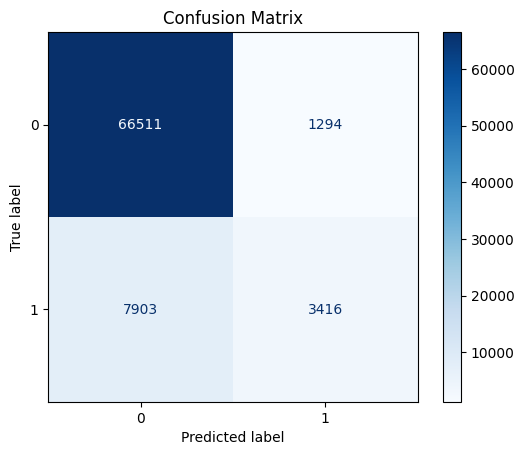

Accuracy: 0.8838
Precision: 0.7253
Recall: 0.3018
F1 Score: 0.4262
AUC-ROC: 0.7339


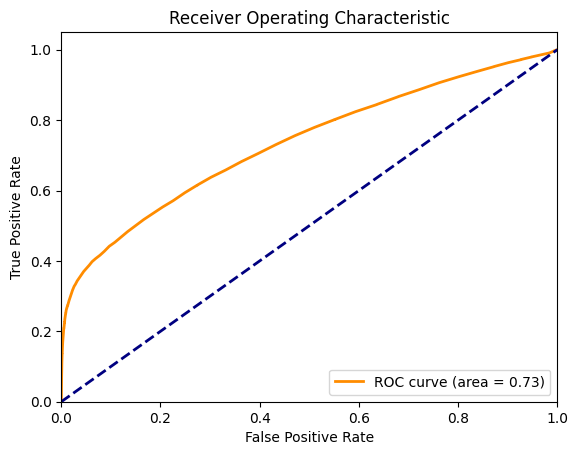

In [36]:
# Train and evaluate the model
train_and_evaluate_model(rf_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

# PassiveAggressiveClassifier

In [37]:
# Define the initial model configuration
pa_model_config = {
    'max_iter': 100,  # Maximum number of iterations
    'random_state': 42,  # Random seed for reproducibility
    'tol': 1e-3  # Tolerance for stopping criteria
}

# Initialize the PassiveAggressiveClassifier
pa_model = PassiveAggressiveClassifier(**pa_model_config)

# Hyperparameter tuning distribution
pa_param_distributions = {
    'C': [0.01, 0.1, 1.0, 10, 100],  # Regularization strength
    'max_iter': [50, 100, 200, 500, 1000],  # Maximum iterations
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping
    'early_stopping': [True, False],  # Whether to stop early if validation score is not improving
    'warm_start': [True, False],  # Whether to reuse the solution of the previous call to fit
    'n_iter_no_change': [5, 10, 20],  # Number of iterations with no improvement before stopping early
    'average': [True, False]  # Whether to average the weight vectors across iterations
}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.47      0.62     67805
           1       0.17      0.63      0.26     11319

    accuracy                           0.50     79124
   macro avg       0.53      0.55      0.44     79124
weighted avg       0.78      0.50      0.57     79124

Confusion Matrix:


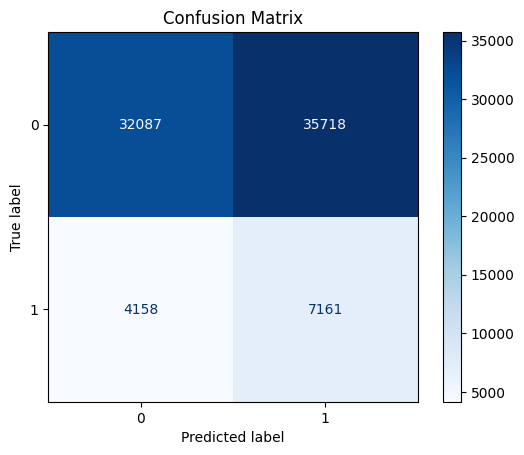

Accuracy: 0.4960
Precision: 0.1670
Recall: 0.6327
F1 Score: 0.2643
AUC-ROC: 0.5742


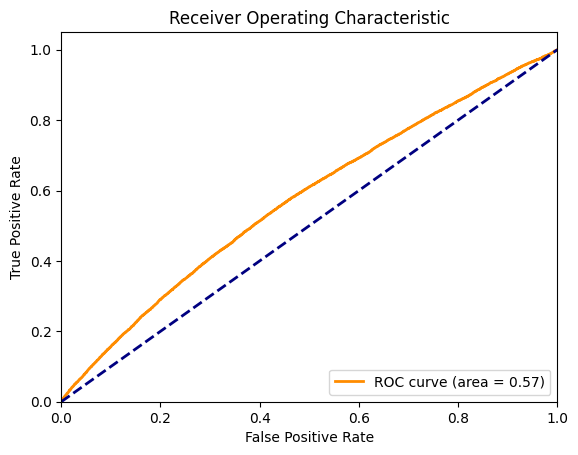

In [38]:
# Train and evaluate the model
train_and_evaluate_model(pa_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

# ExtraTreesClassifier

In [39]:
# Define the initial model configuration
et_model_config = {
    'n_estimators': 100,
    'n_jobs': -1,  # Use all processors for parallelism
    'random_state': 42,  # Random seed for reproducibility
    'max_depth': None,  # Maximum depth of the tree (None means the tree is expanded until all leaves are pure)
    'min_samples_split': 2,  # Minimum number of samples required to split an internal node
}

# Initialize the ExtraTreesClassifier
et_model = ExtraTreesClassifier(**et_model_config)

# Hyperparameter tuning distribution
et_param_distributions = {
    'n_estimators': [50, 100, 200, 400],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False],  # Whether to use bootstrap samples when building trees
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'oob_score': [True, False],  # Whether to use out-of-bag samples to estimate the generalization accuracy
    'warm_start': [True, False]  # Whether to reuse the solution of the previous call to fit
}


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     67805
           1       0.77      0.31      0.44     11319

    accuracy                           0.89     79124
   macro avg       0.83      0.65      0.69     79124
weighted avg       0.88      0.89      0.87     79124

Confusion Matrix:


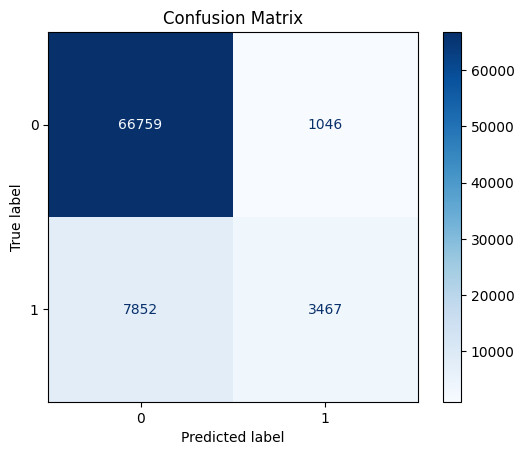

Accuracy: 0.8875
Precision: 0.7682
Recall: 0.3063
F1 Score: 0.4380
AUC-ROC: 0.7235


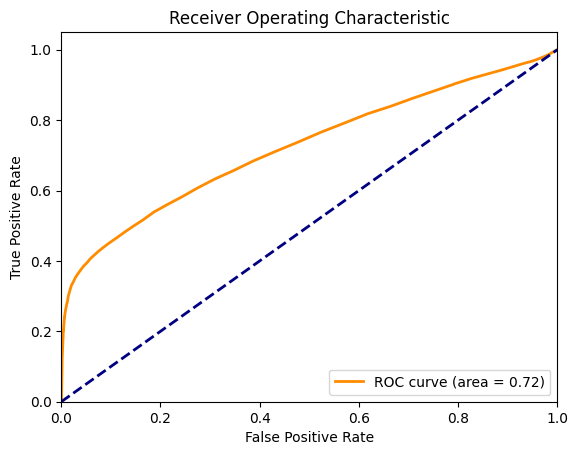

In [40]:
# Train and evaluate the model
train_and_evaluate_model(et_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

# Hyperparameter tuning

In [41]:
# Perform hyperparameter tuning
lg_best_model = hyperparameter_tuning(lg_model, lg_param_distributions, X_train_scaled, y_train_merged, n_iter, cv, scoring, random_state)

Best parameters: {'tol': 0.01, 'max_iter': 2000, 'C': 1}


In [42]:
# Perform hyperparameter tuning
pa_best_model = hyperparameter_tuning(pa_model, pa_param_distributions, X_train_scaled, y_train_merged, n_iter, cv, scoring, random_state)

Best parameters: {'warm_start': True, 'tol': 0.01, 'n_iter_no_change': 20, 'max_iter': 500, 'early_stopping': True, 'average': True, 'C': 0.01}


# Tuned model

In [43]:
def evaluate_tuned_model(model, X_test, y_test):
    # Fit the model only if it's not already trained
    
    # Predict the test set
    y_pred = model.predict(X_test)
    
    # Check if model supports decision_function or predict_proba
    try:
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_pred_prob = model.decision_function(X_test)  # Use decision_function for specific models like PAClassifier
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print and plot confusion matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    
    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.62      0.73     67805
           1       0.22      0.63      0.32     11319

    accuracy                           0.62     79124
   macro avg       0.56      0.62      0.53     79124
weighted avg       0.81      0.62      0.68     79124

Confusion Matrix:


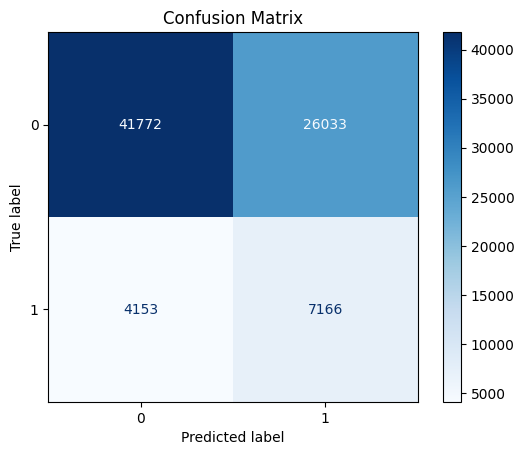

Accuracy: 0.6185
Precision: 0.2158
Recall: 0.6331
F1 Score: 0.3219
AUC-ROC: 0.6760


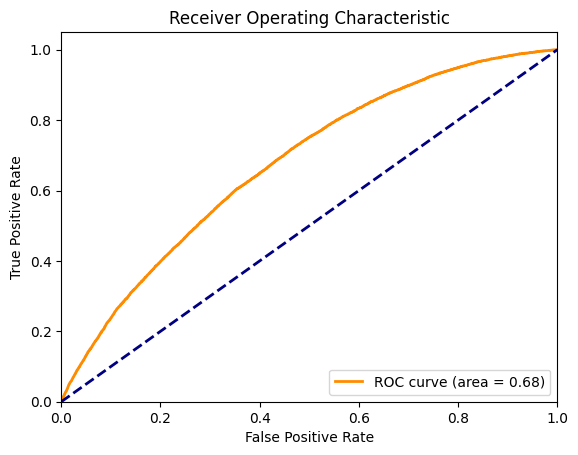

In [44]:
# Train and evaluate the model
evaluate_tuned_model(lg_best_model, X_test_scaled, y_test_merged)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.47      0.62     67805
           1       0.19      0.74      0.30     11319

    accuracy                           0.51     79124
   macro avg       0.55      0.61      0.46     79124
weighted avg       0.81      0.51      0.58     79124

Confusion Matrix:


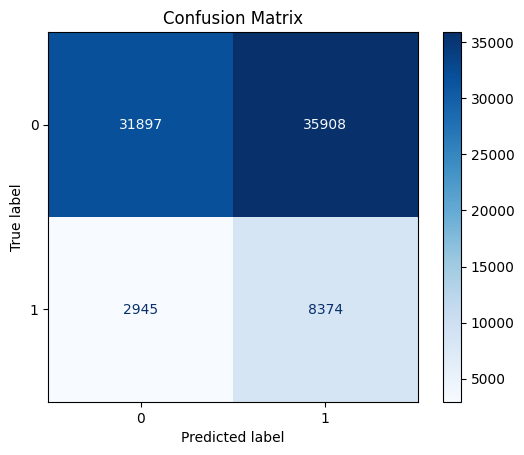

Accuracy: 0.5090
Precision: 0.1891
Recall: 0.7398
F1 Score: 0.3012
AUC-ROC: 0.6481


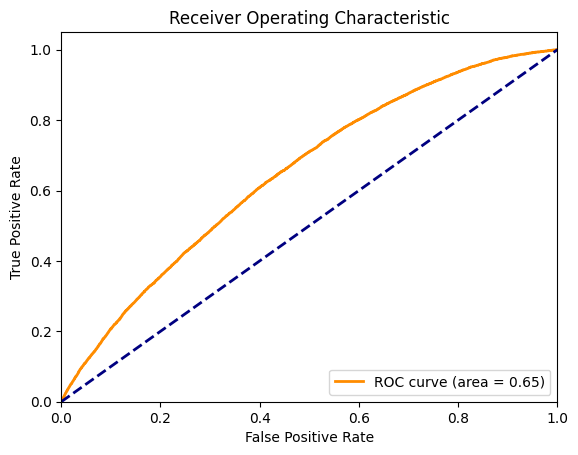

In [ ]:
# Train and evaluate the model 
evaluate_tuned_model(pa_best_model, X_test_scaled, y_test_merged)